In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [200]:
data =pd.read_csv(r'C:\Users\4B\Desktop\Housing.csv')

In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [202]:
data.isna().sum()/data.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [203]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
540    False
541    False
542    False
543    False
544    False
Length: 545, dtype: bool

In [204]:
data.duplicated().sum()

np.int64(0)

In [205]:
data.corr

<bound method DataFrame.corr of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no

In [206]:
data.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [207]:
data.dtypes.value_counts()

object    7
int64     6
Name: count, dtype: int64

In [208]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


<Axes: >

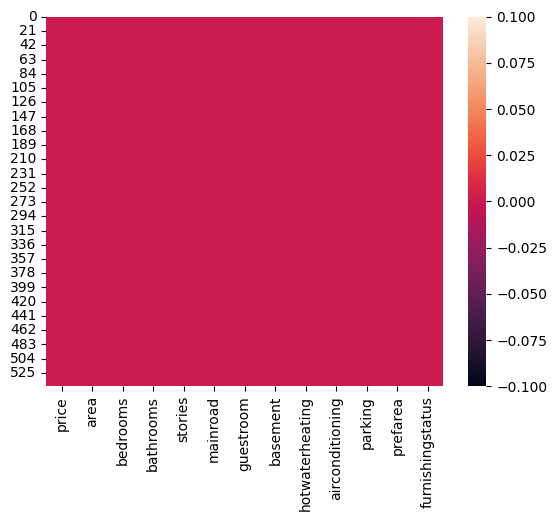

In [209]:
sns.heatmap(data.isna())

<Axes: >

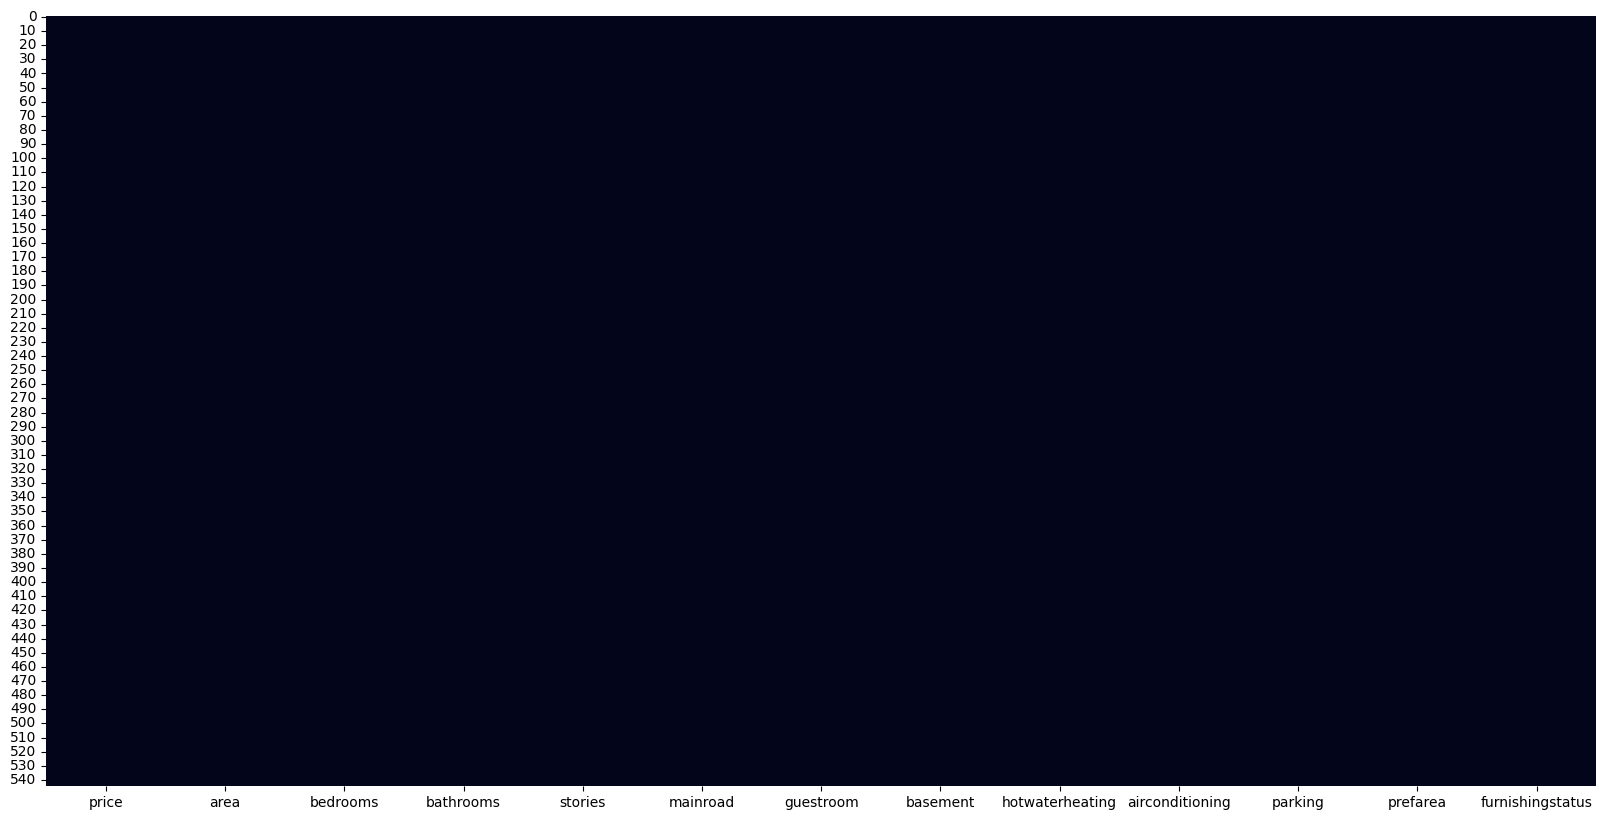

In [210]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.isna(),cbar=False)

### EDA:
determiner les valeurs explicatives ( caractéristiques)  et les variables cibles (target:=> variable à prédire )

In [211]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

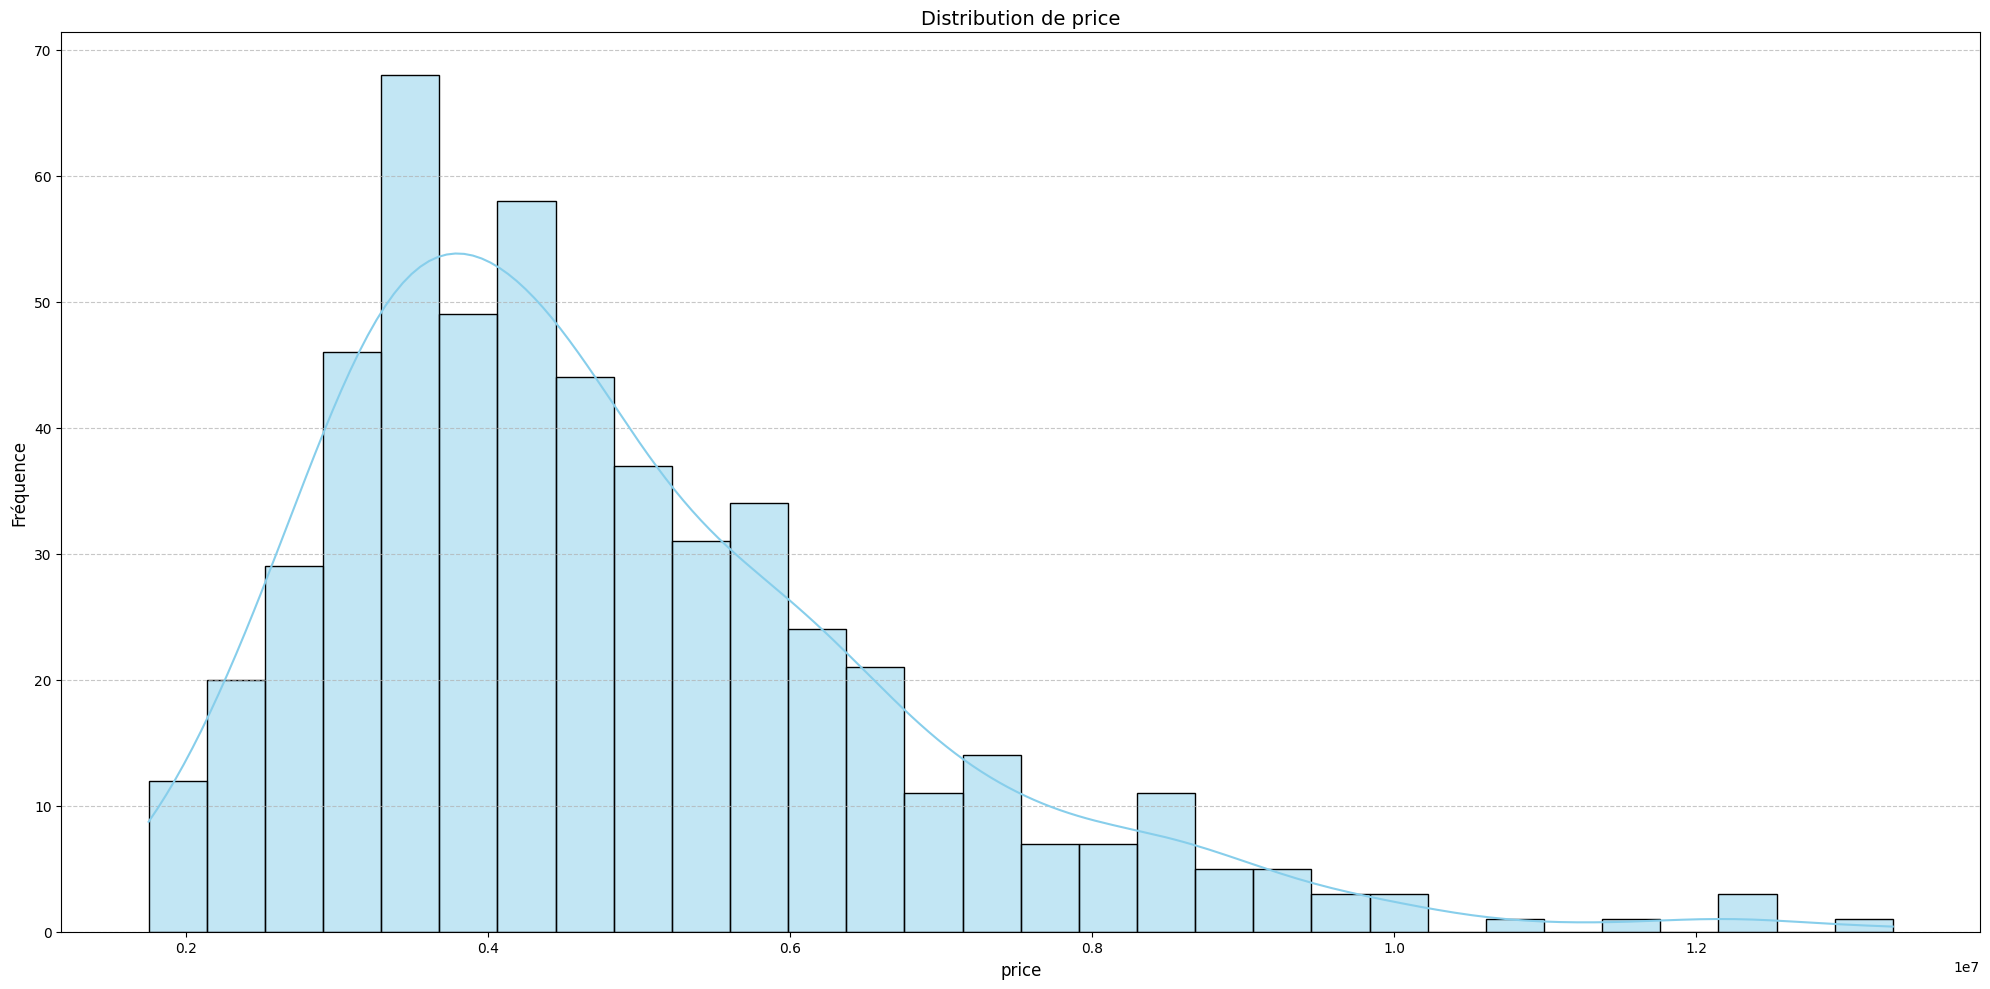

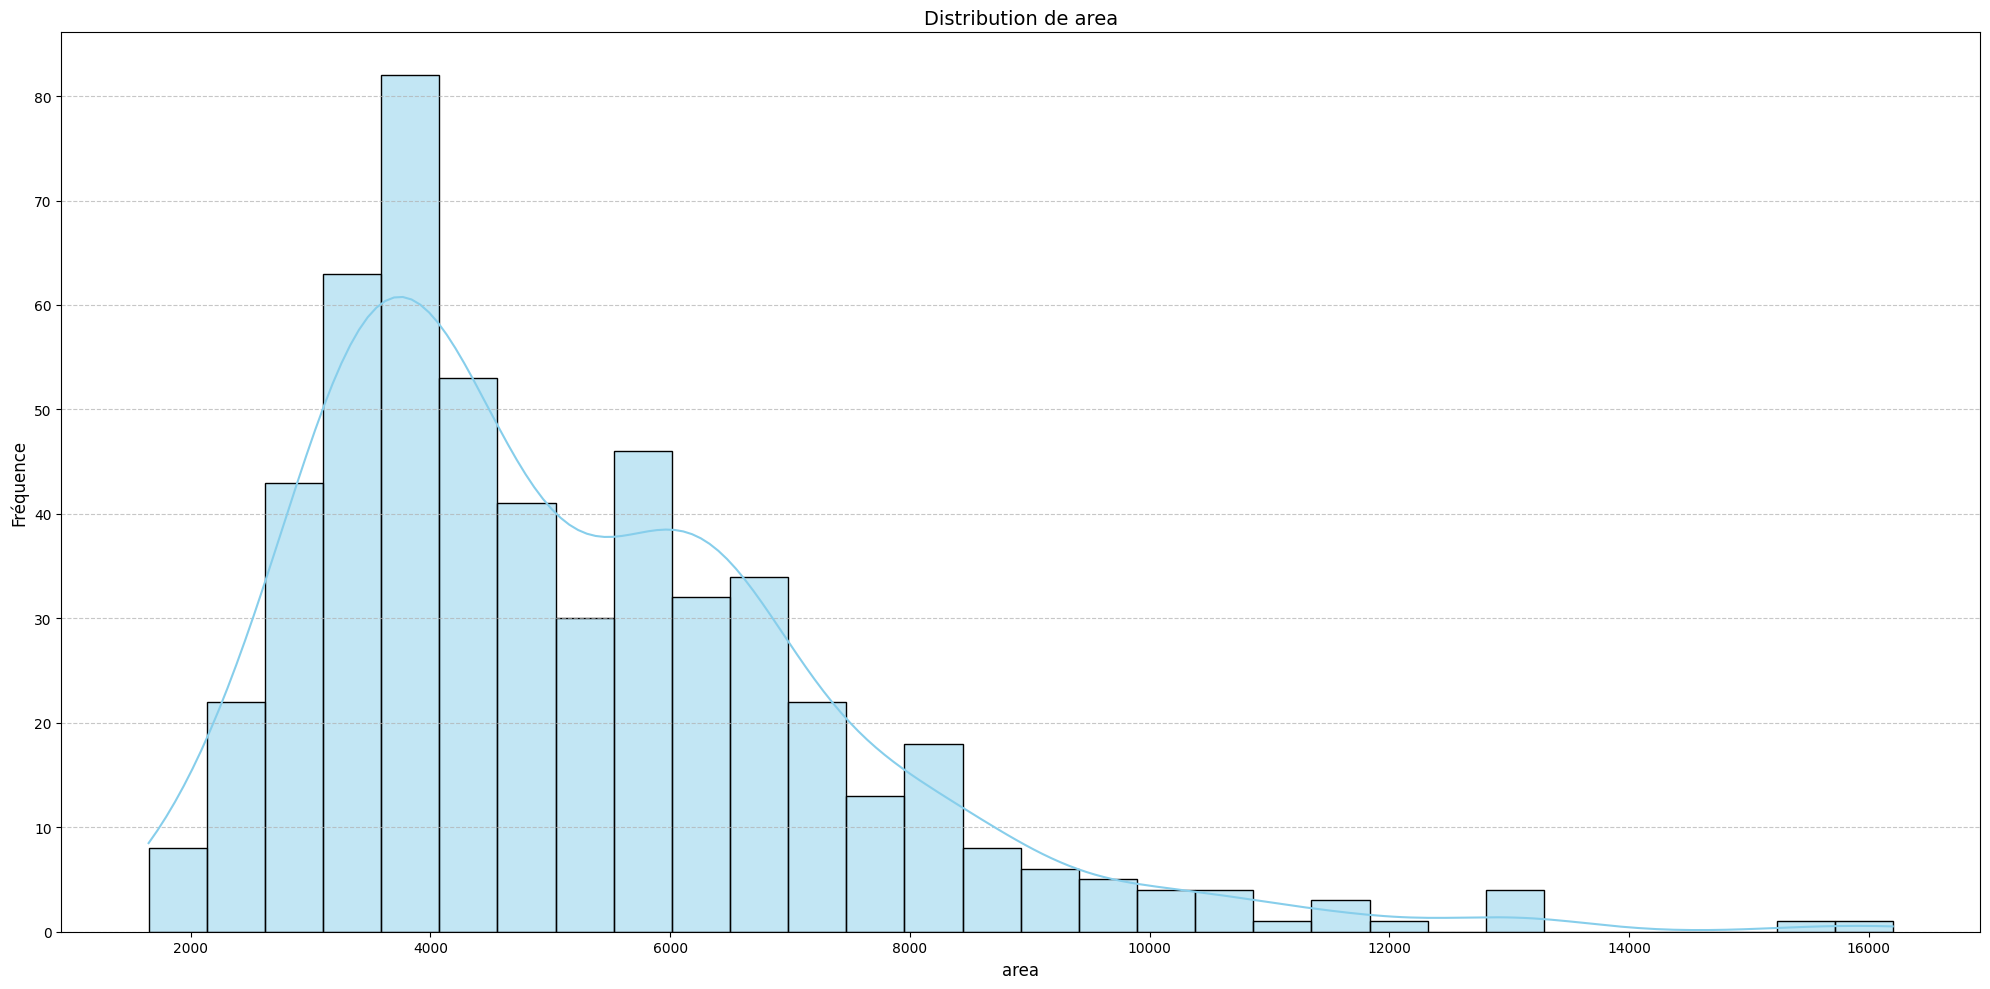

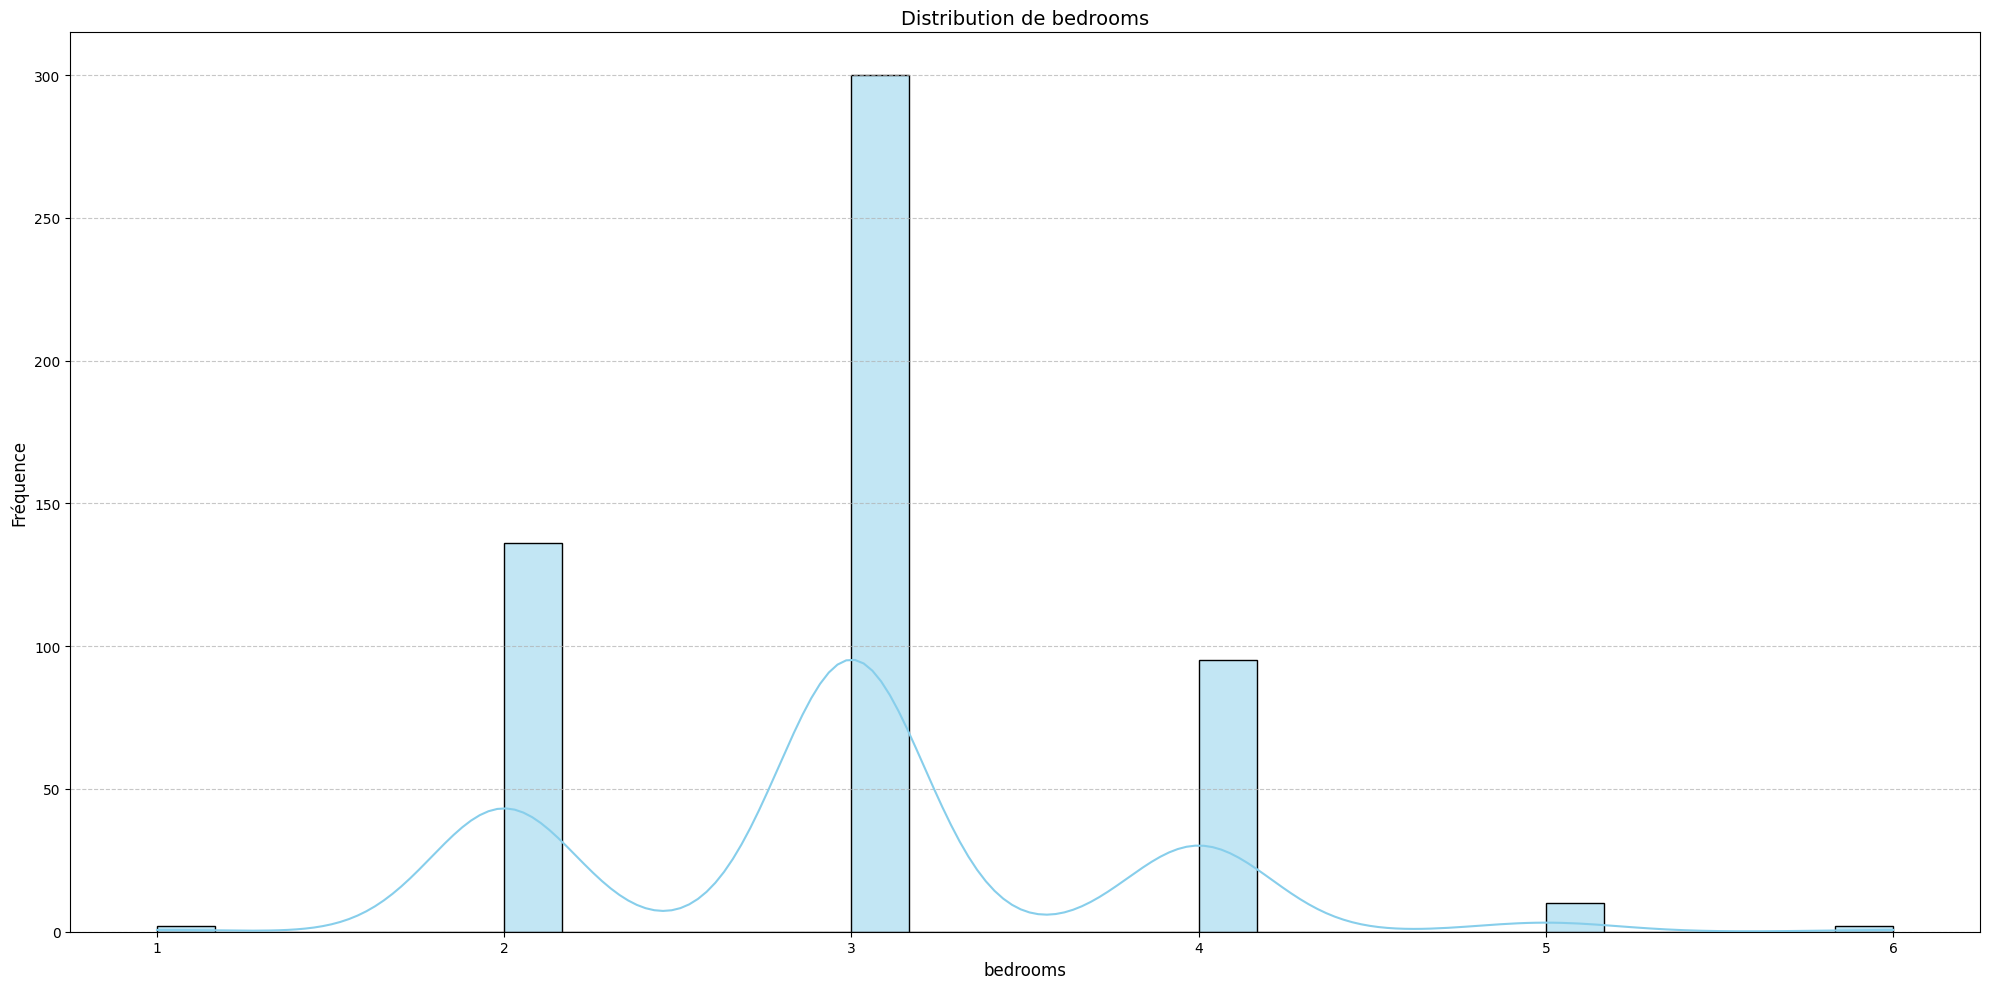

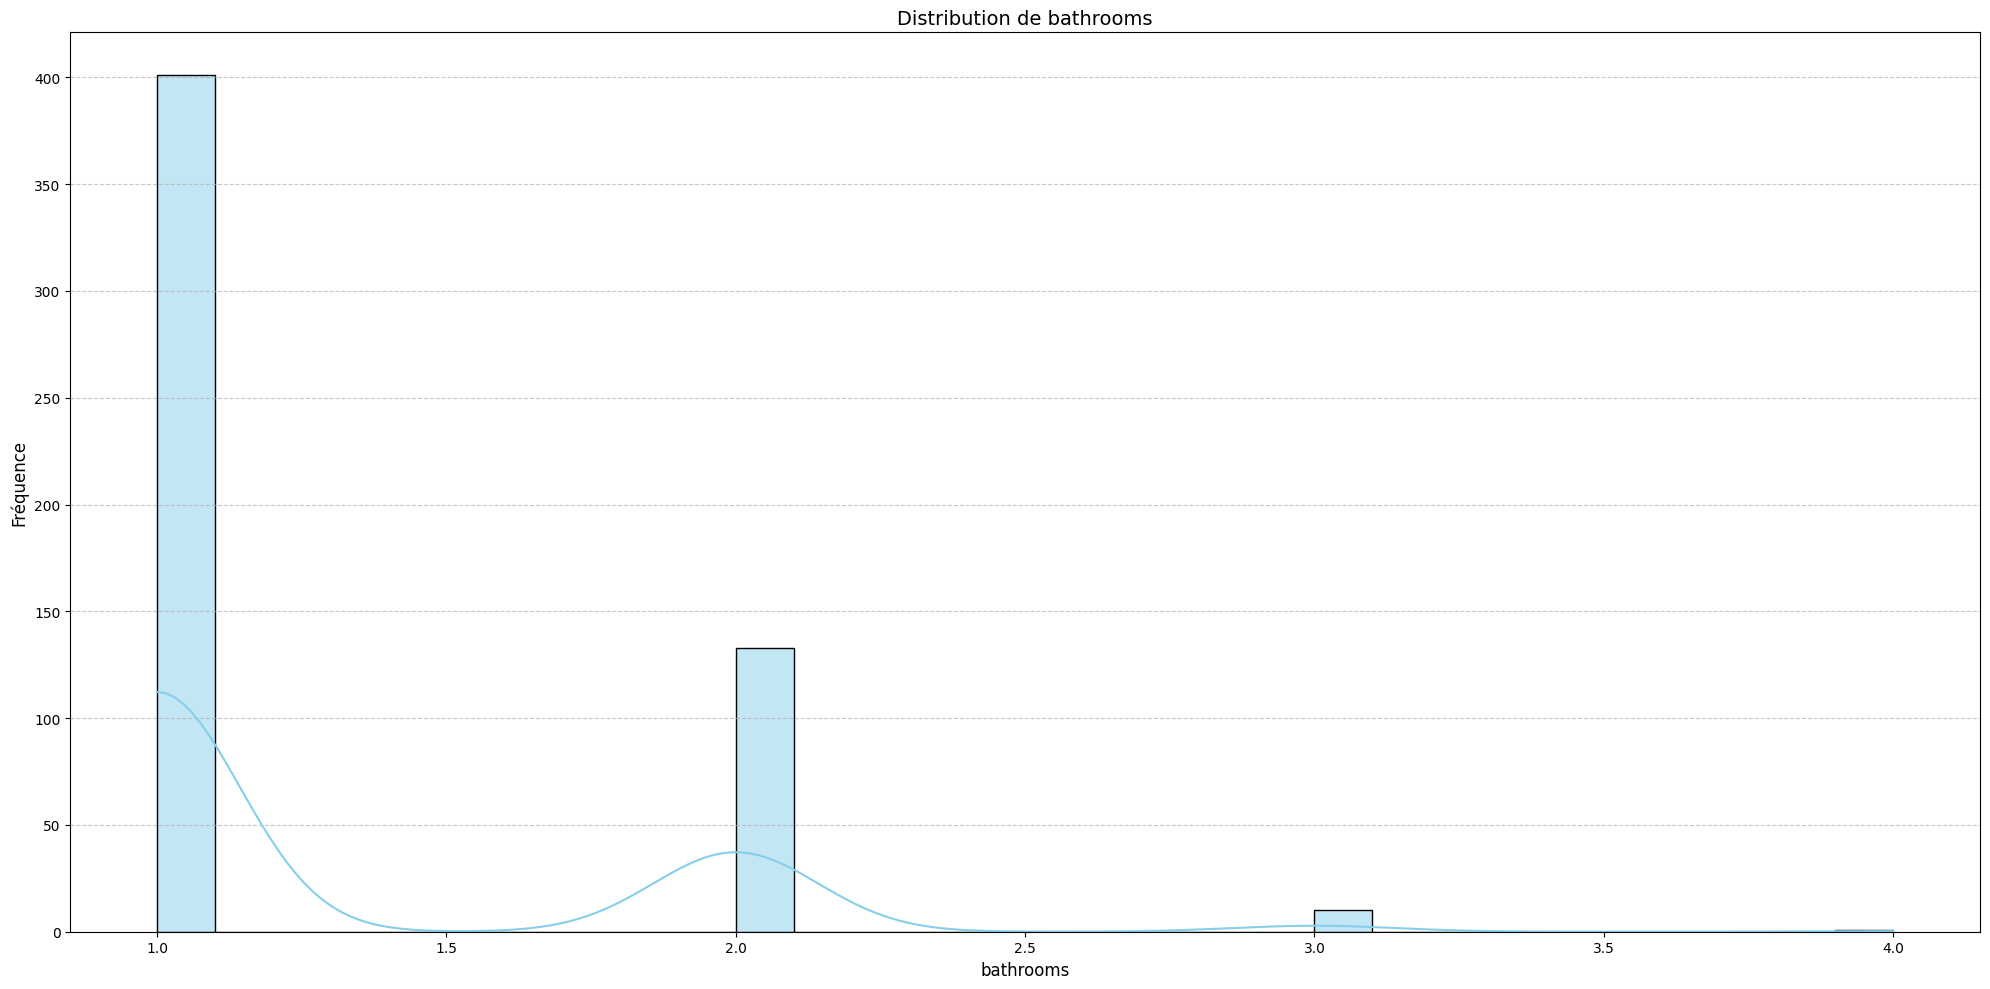

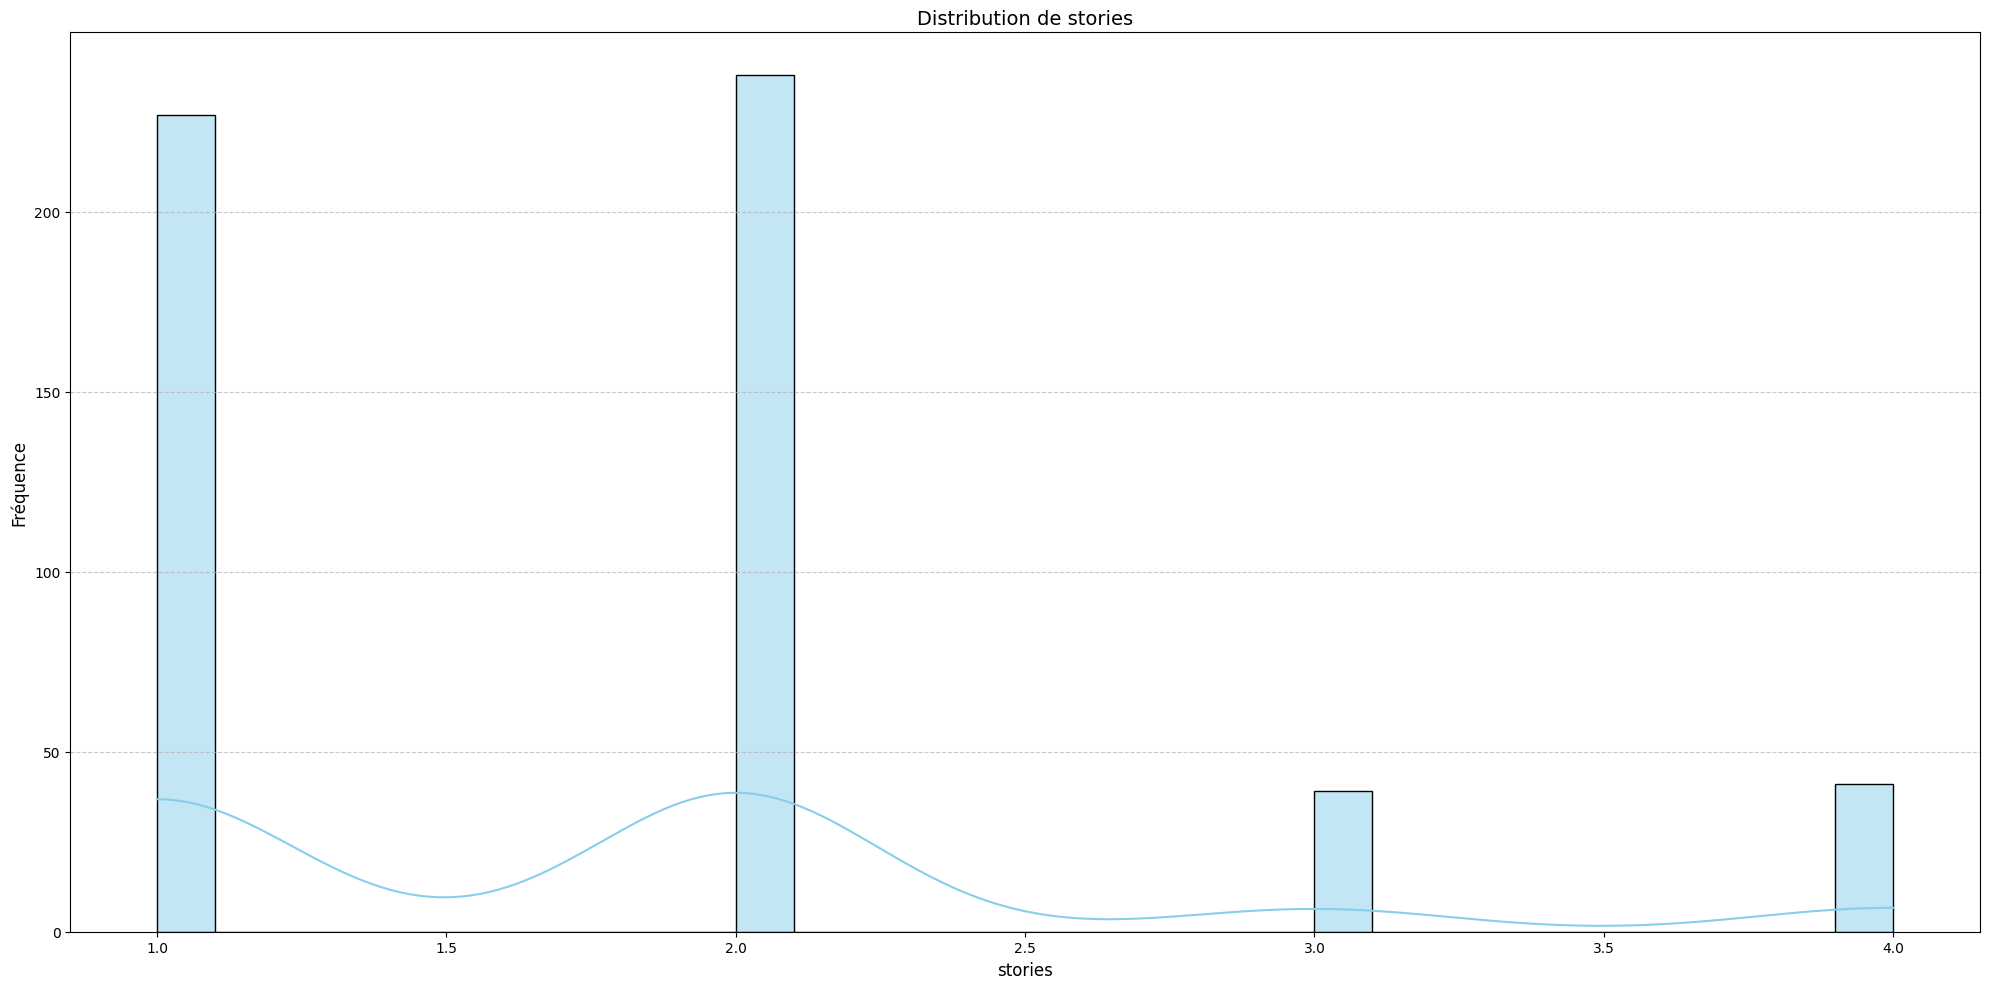

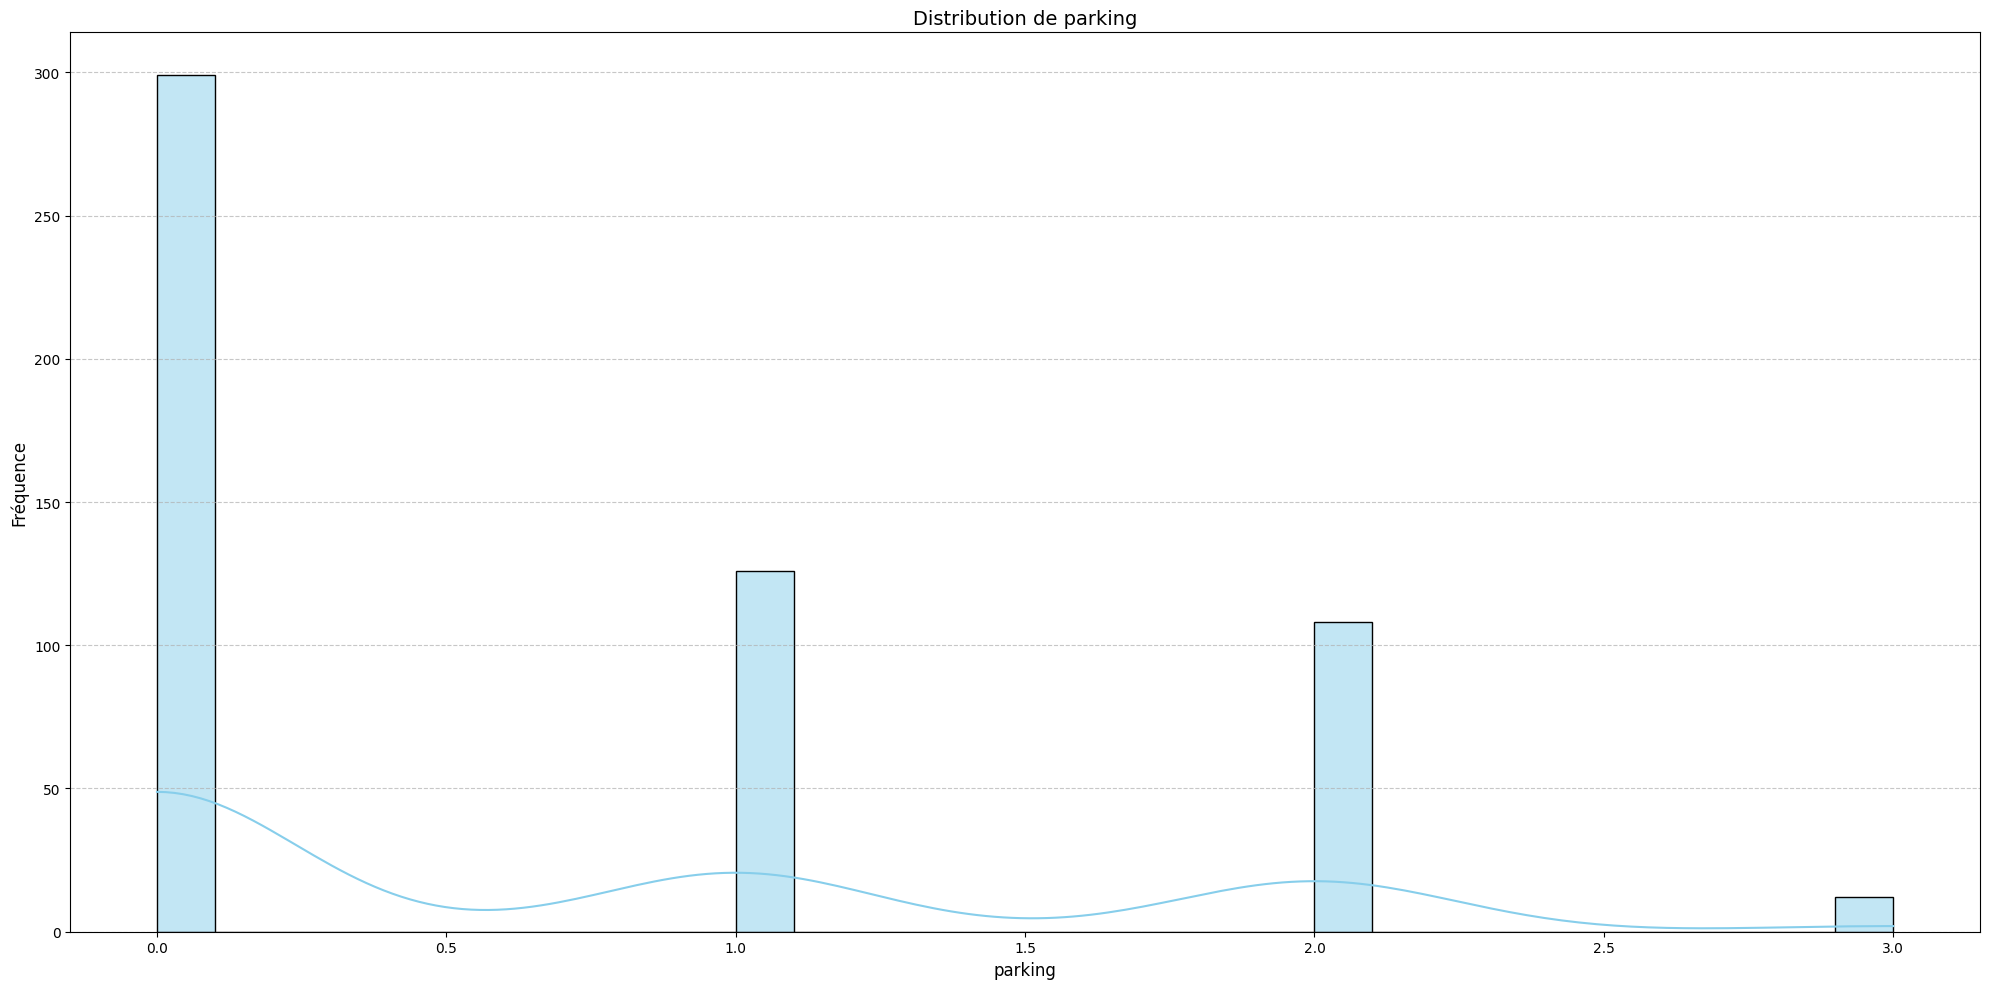

In [212]:
for col in data.select_dtypes('int'):
    plt.figure(figsize=(20, 10))  
    sns.histplot(data=data , x=col, kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution de {col}", fontsize=14)  
    plt.xlabel(col, fontsize=12)  
    plt.ylabel("Fréquence", fontsize=12)  
    plt.grid(axis='y', linestyle='--', alpha=0.7)  
    plt.tight_layout()
    plt.show()

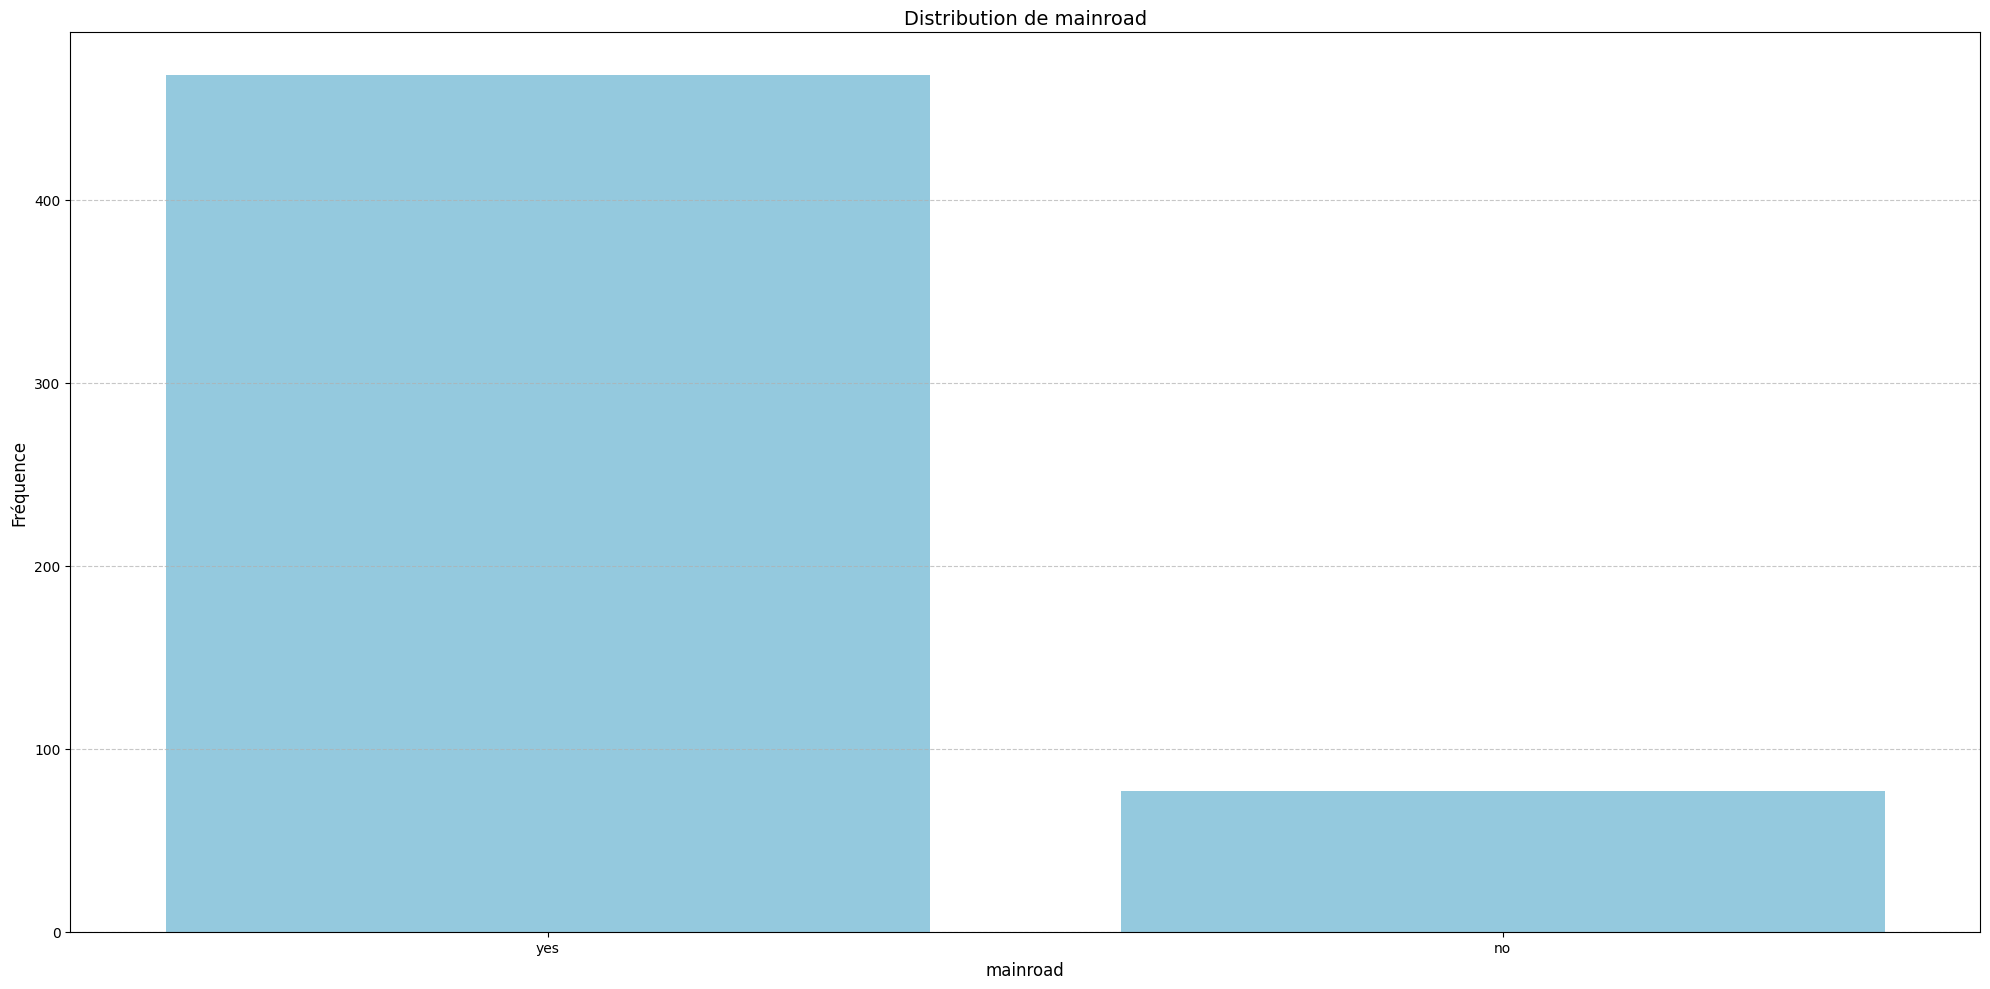

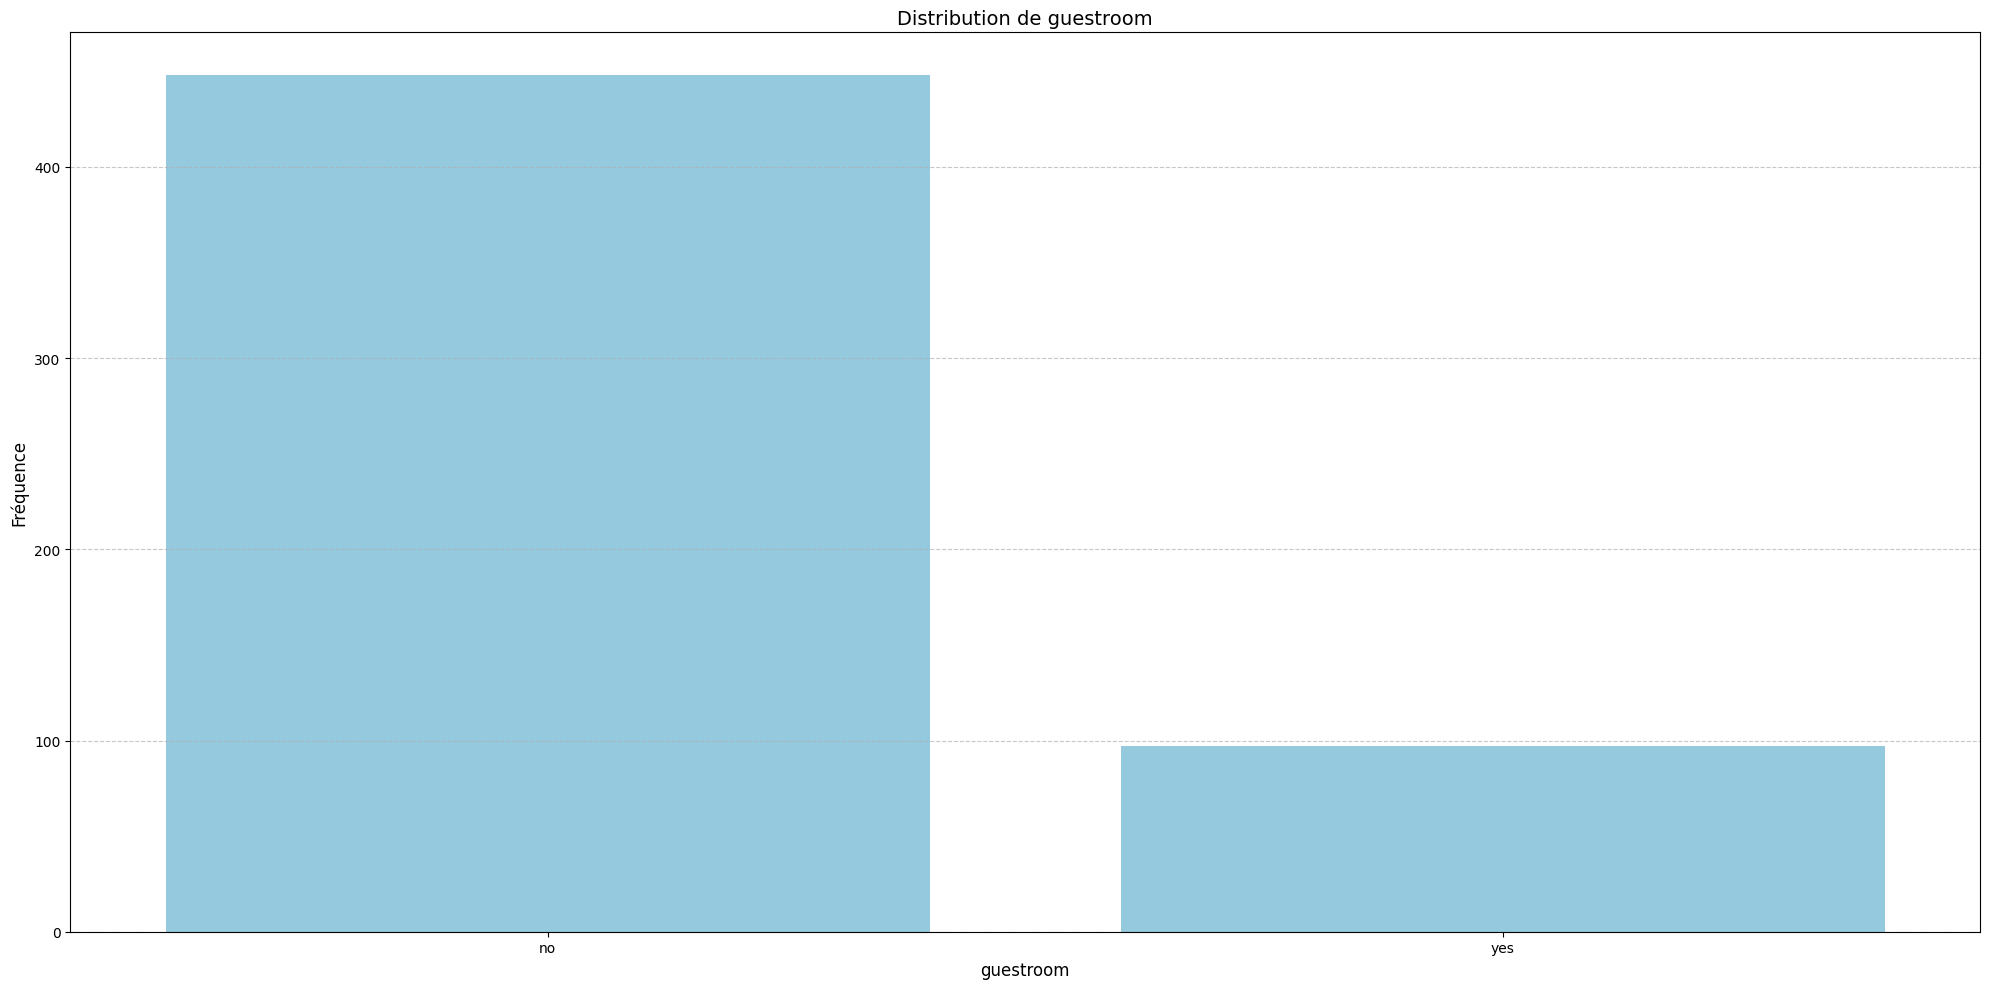

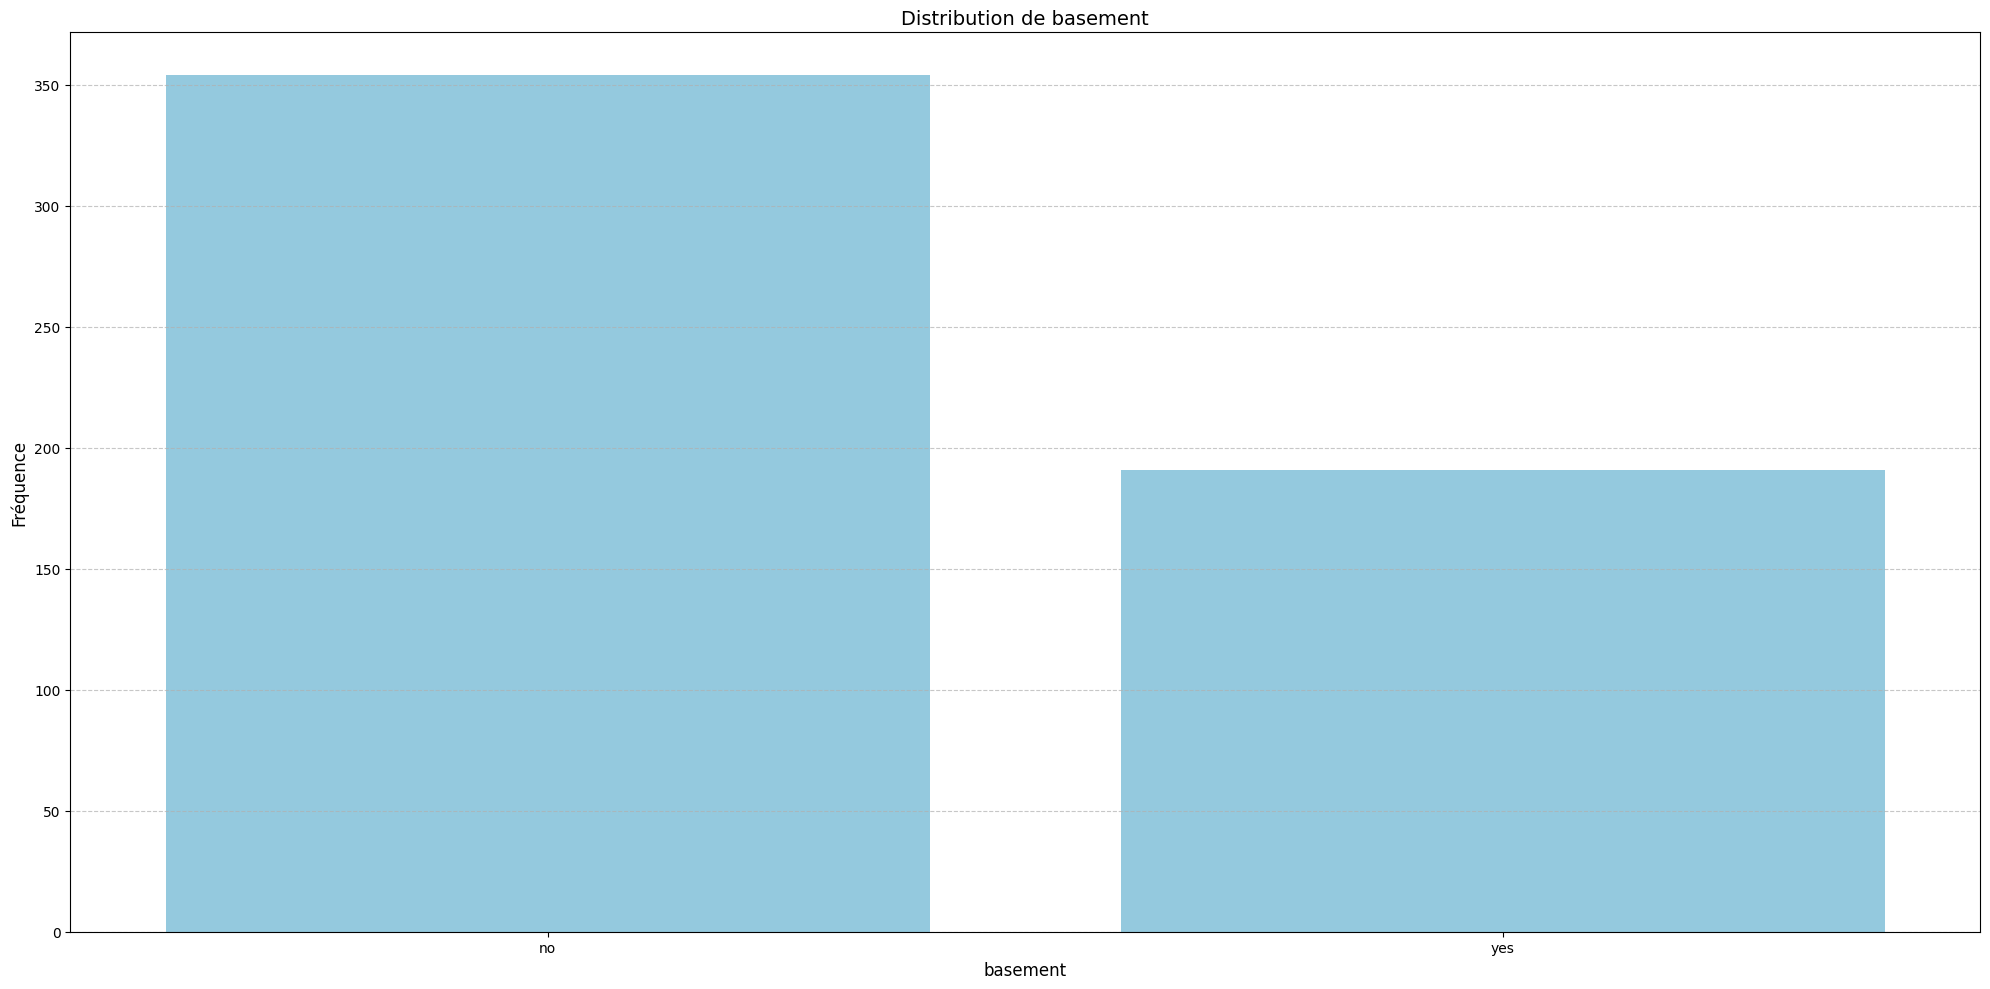

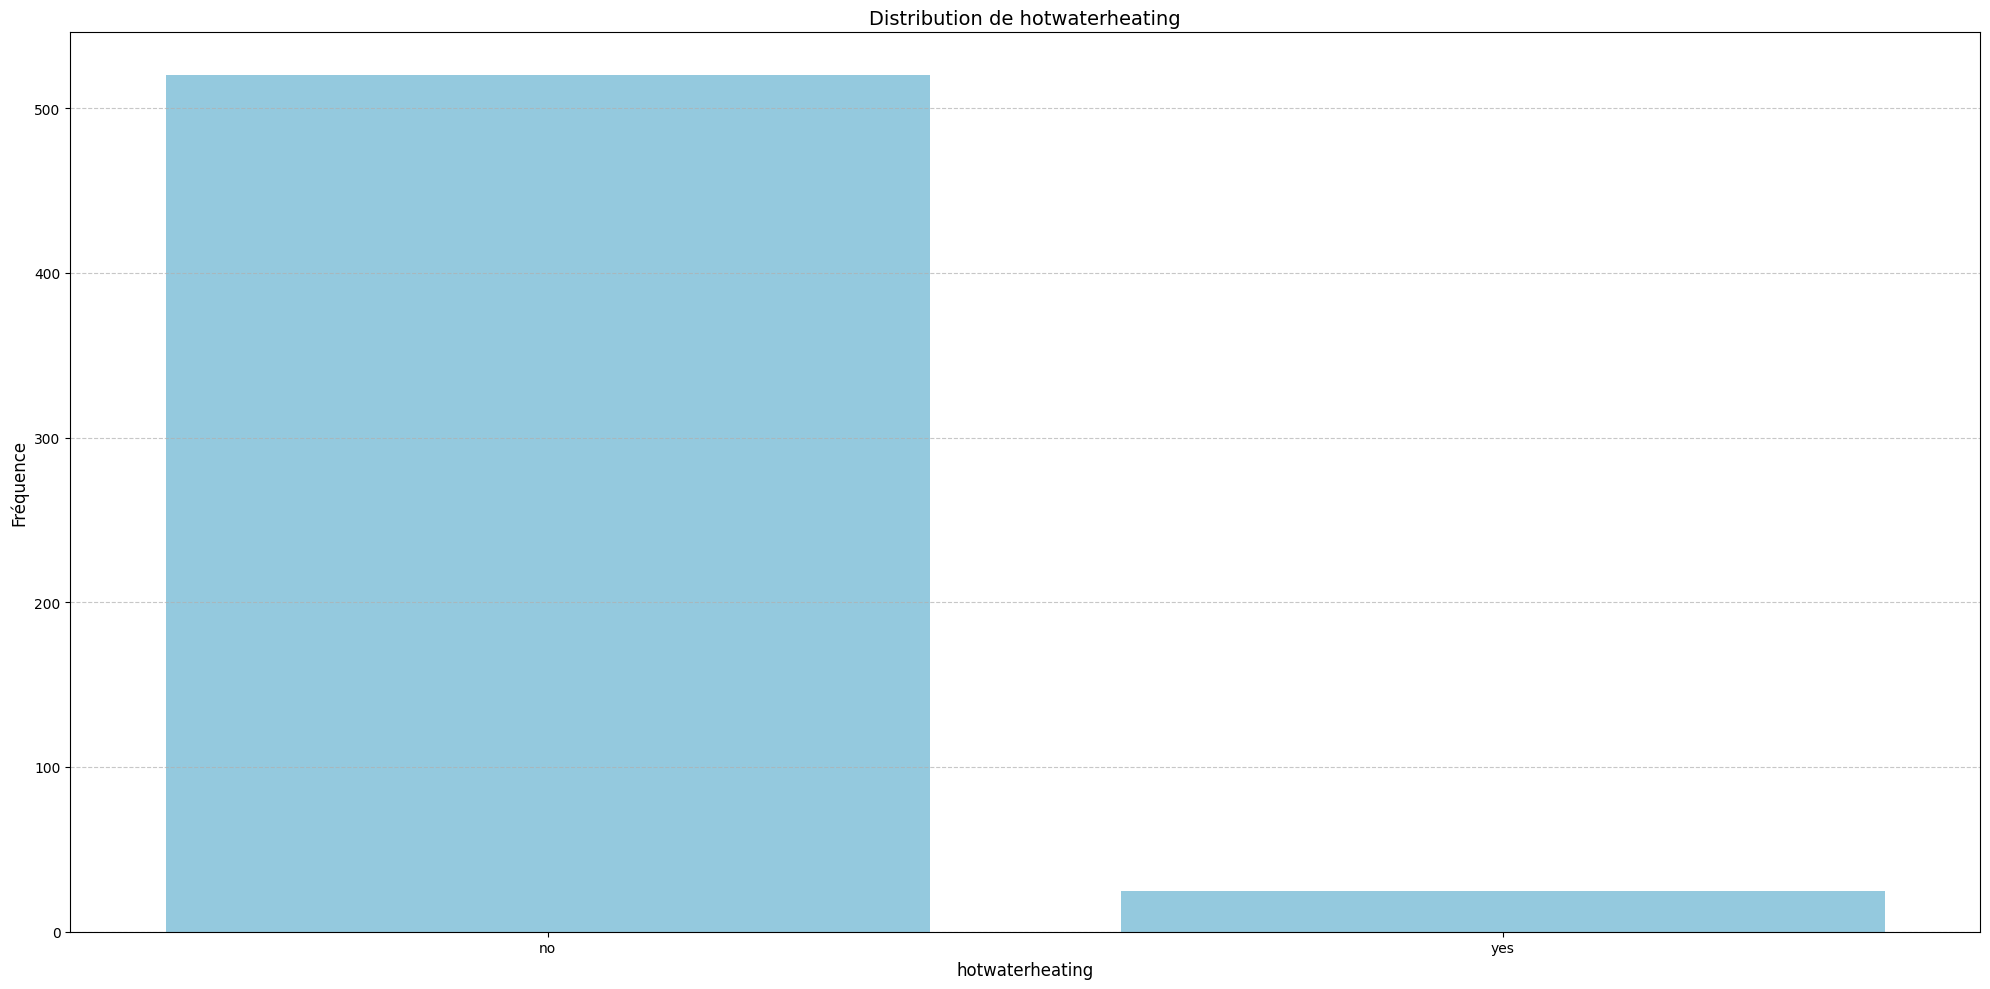

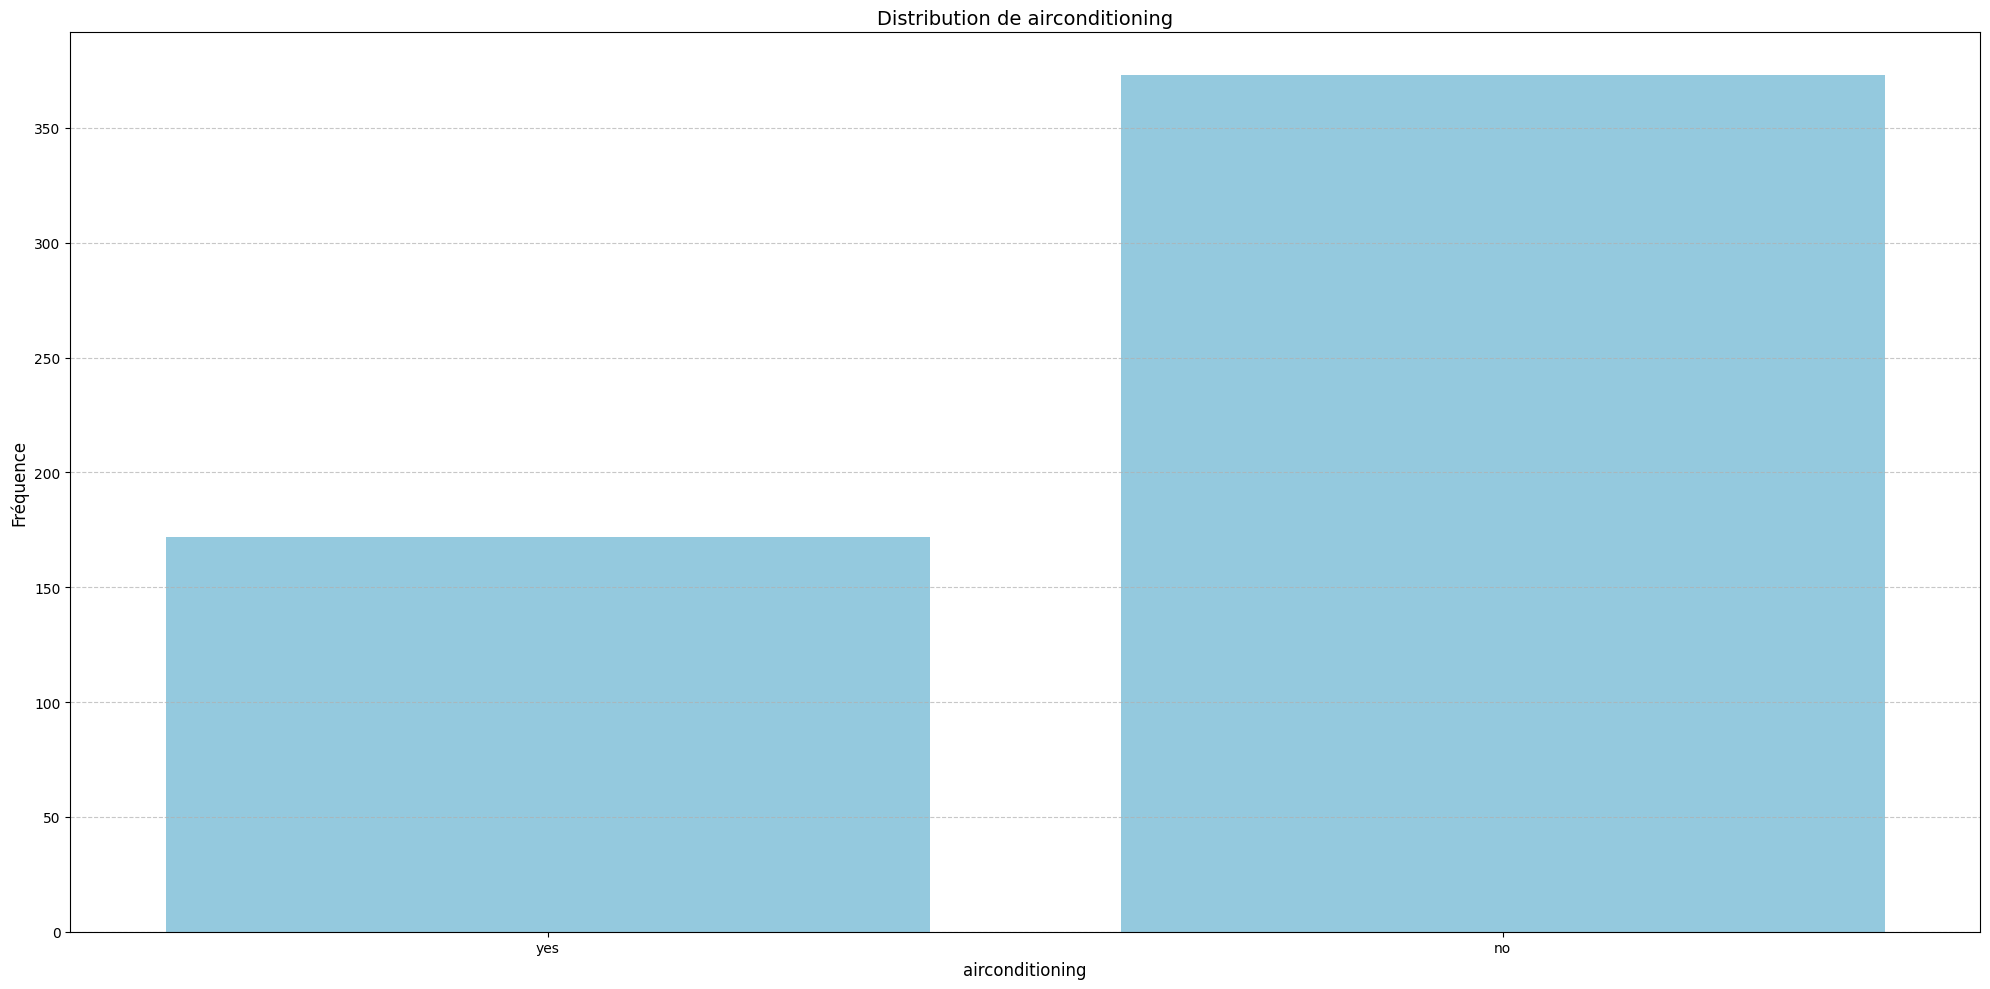

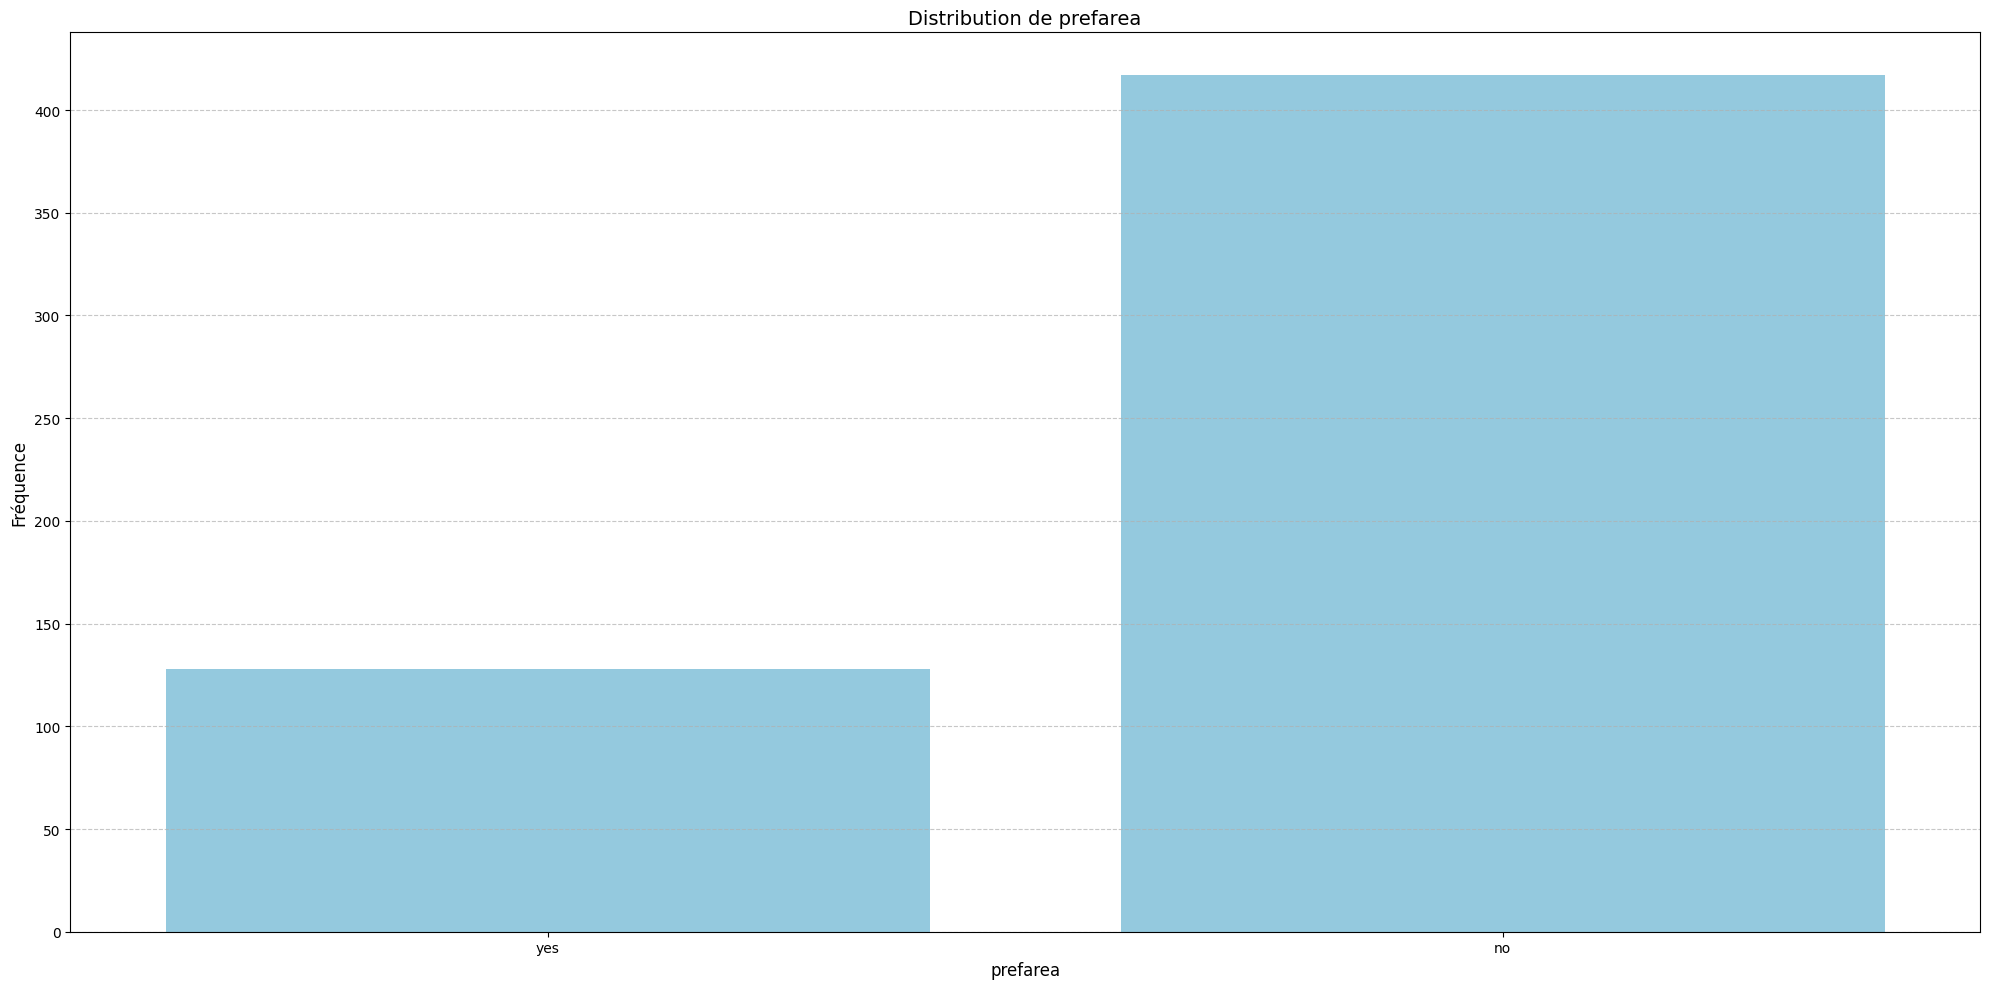

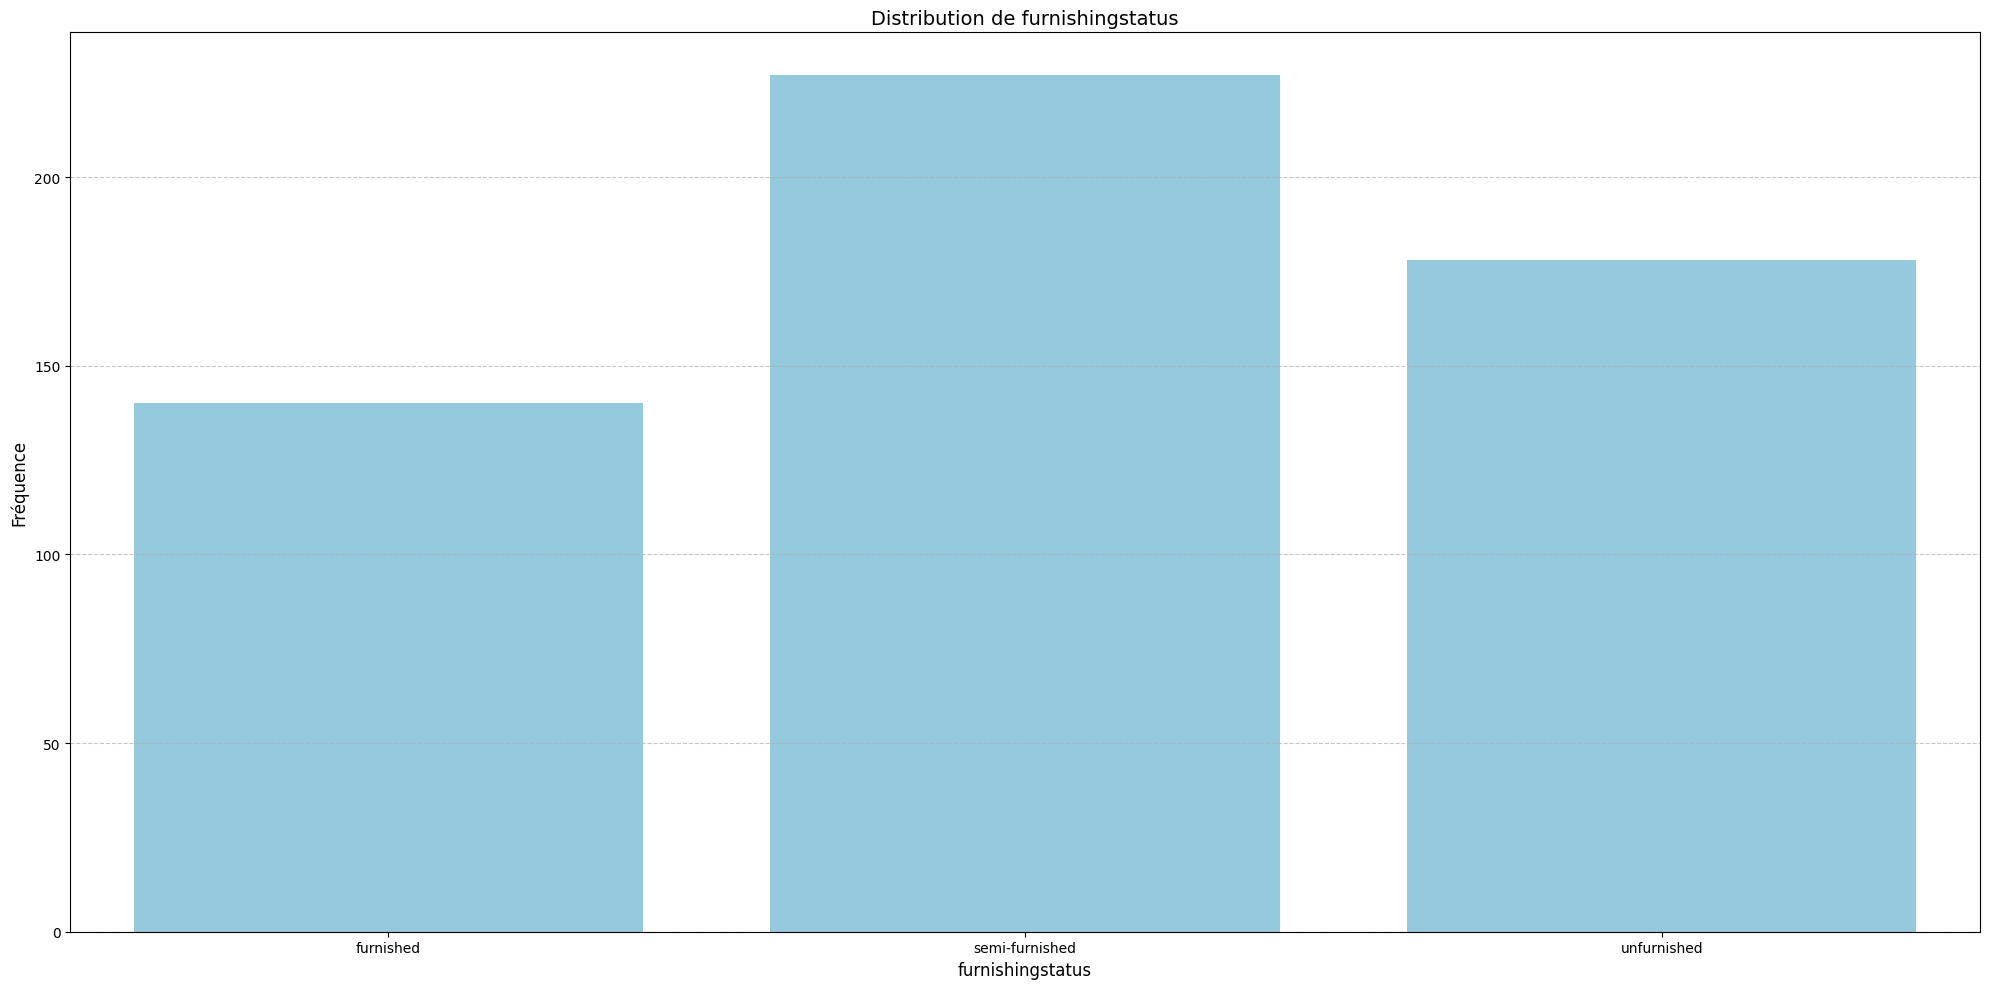

In [213]:
for col in data.select_dtypes('object'):
    plt.figure(figsize=(20, 10))  
    sns.countplot(data=data , x=col,  color='skyblue')
    plt.title(f"Distribution de {col}", fontsize=14)  
    plt.xlabel(col, fontsize=12)  
    plt.ylabel("Fréquence", fontsize=12)  
    plt.grid(axis='y', linestyle='--', alpha=0.7)  
    plt.tight_layout()
    plt.show()

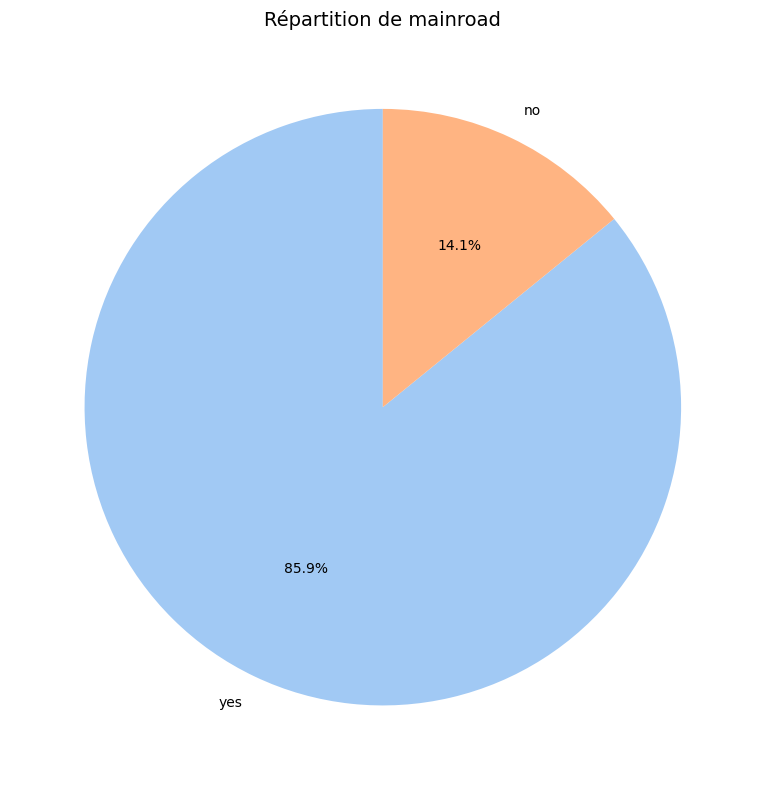

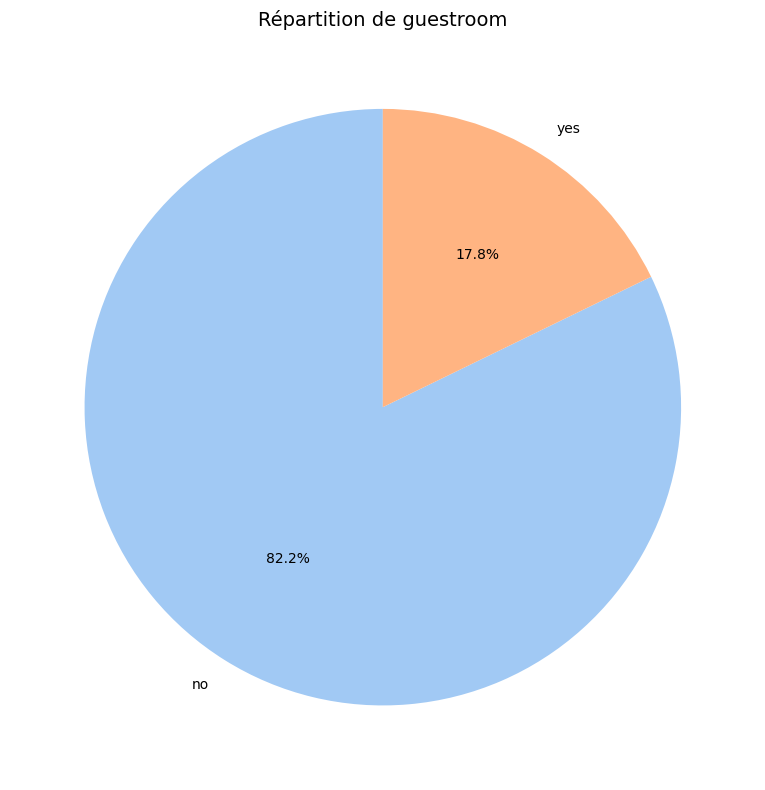

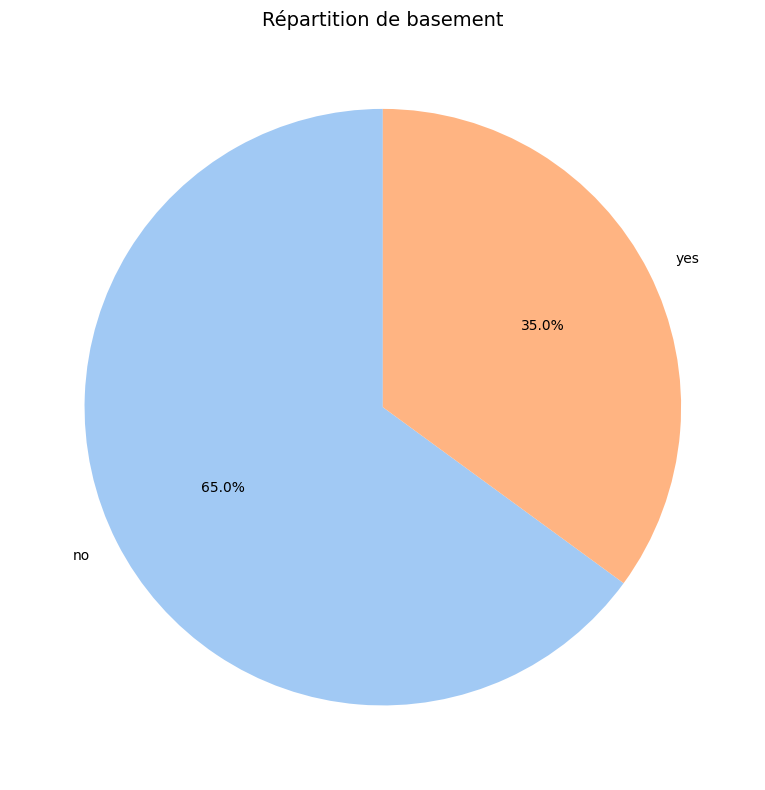

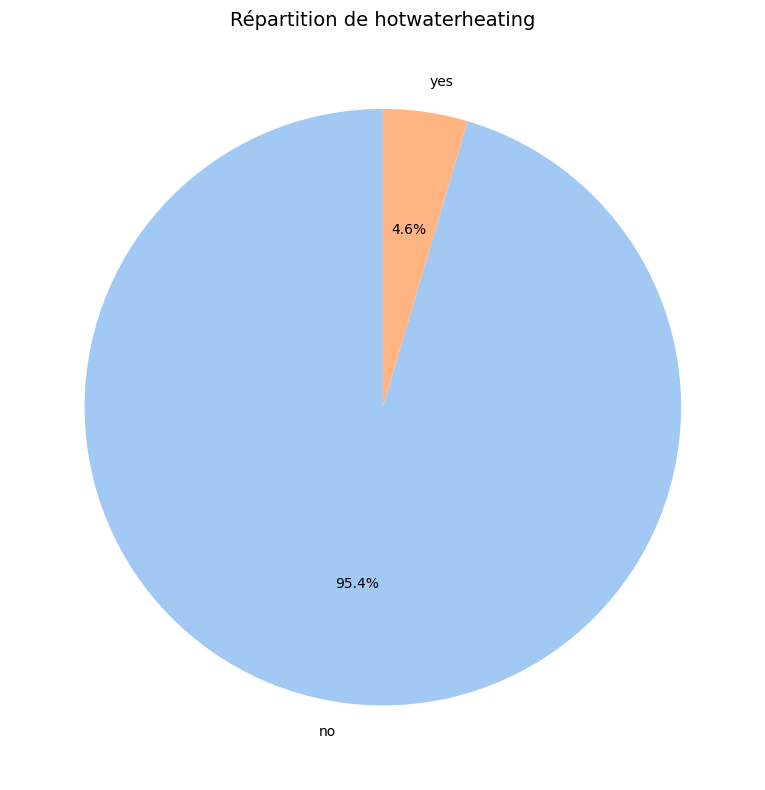

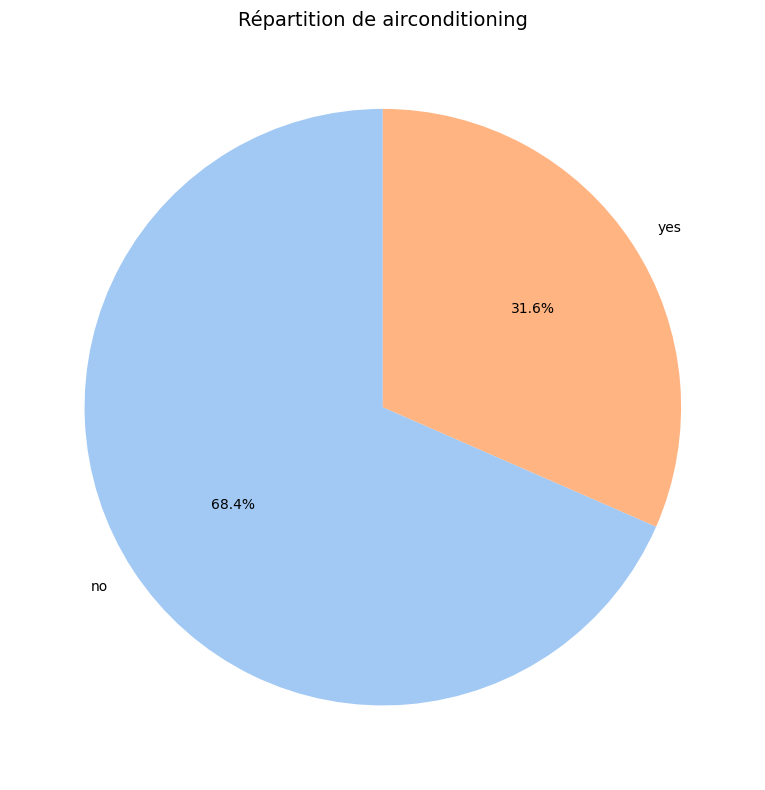

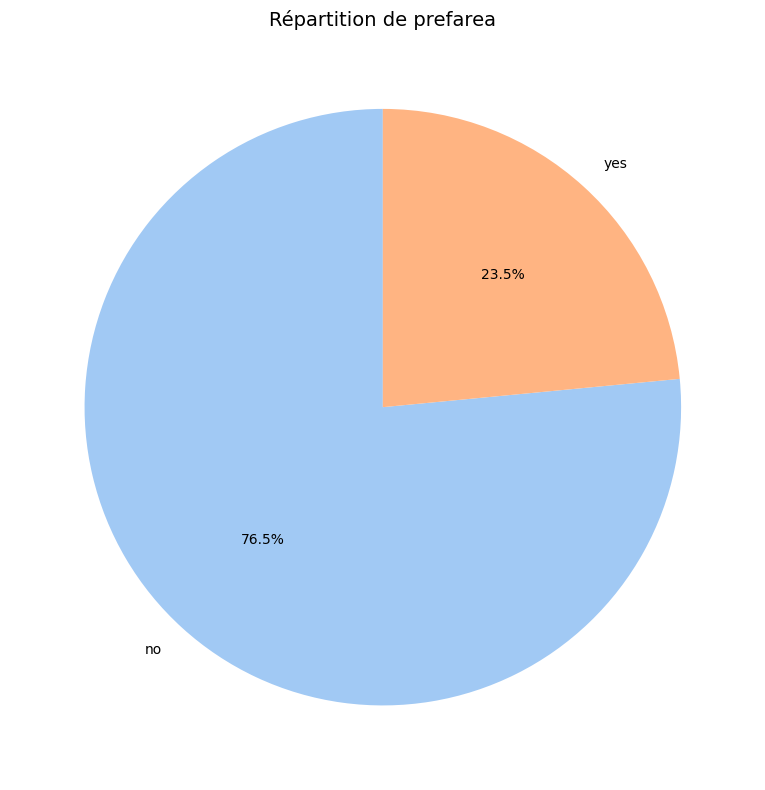

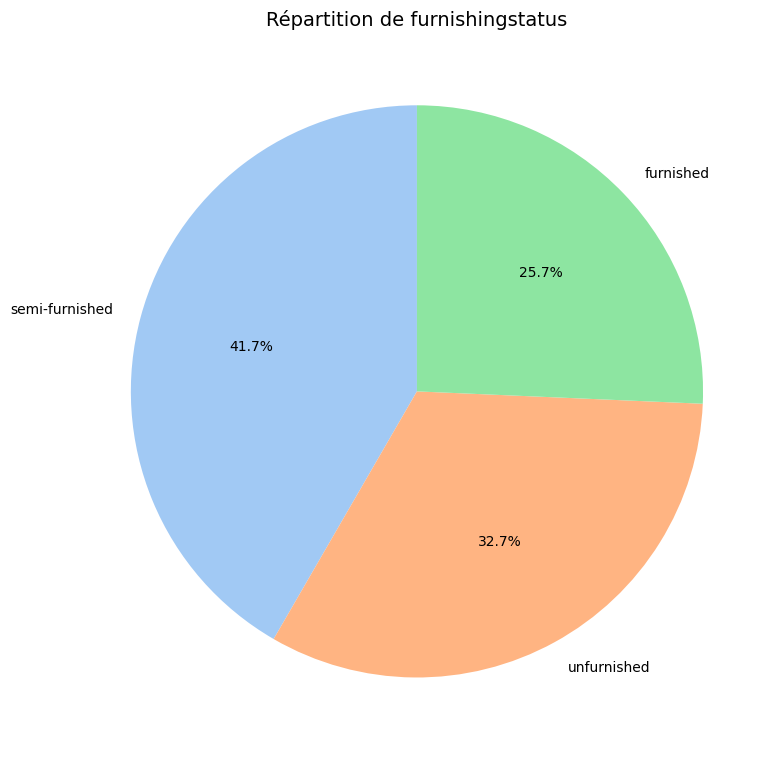

In [214]:
for col in data.select_dtypes(include='object'):
    plt.figure(figsize=(8, 8))
    data[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    plt.title(f"Répartition de {col}", fontsize=14)
    plt.ylabel('')  
    plt.tight_layout()
    plt.show()

In [215]:
data.corr

<bound method DataFrame.corr of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no

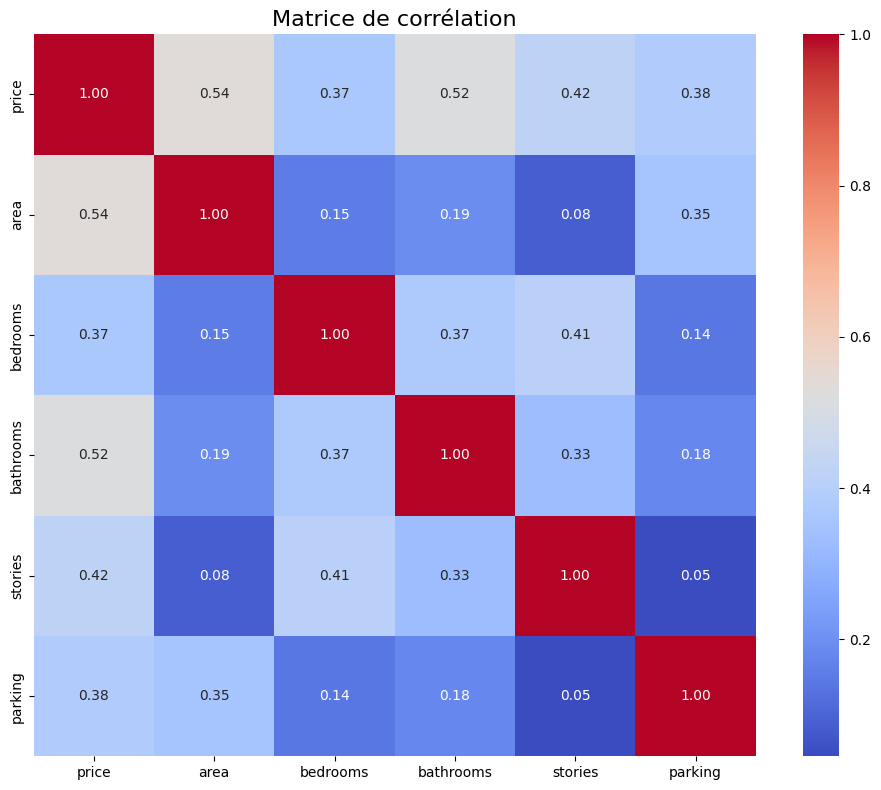

In [216]:
plt.figure(figsize=(10, 8))  
numeric_data = data.select_dtypes(include='number')
sns.heatmap(numeric_data.corr(), annot=True, square=True, cmap='coolwarm', fmt='.2f')

plt.title("Matrice de corrélation", fontsize=16)
plt.tight_layout()
plt.show()

In [217]:
X=data.drop('price',axis=1)
Y=data ['price']

In [224]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), make_column_selector(dtype_include='int')),   # Pour variables int
    ('cat', OneHotEncoder(handle_unknown='ignore'), make_column_selector(dtype_include='object'))  # Pour variables object
])

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', LinearRegression())
])

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [220]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000020E03EDF250>),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000020E03EDF550>)])),
                ('model', RandomForestRegressor(random_state=42))])

In [221]:
y_pred = pipeline.predict(X_test)

In [222]:
from sklearn.metrics import mean_squared_error, r2_score


In [223]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE : {mse:.2f}")
print(f"R² : {r2:.2f}")

MSE : 1971006449235.81
R² : 0.61


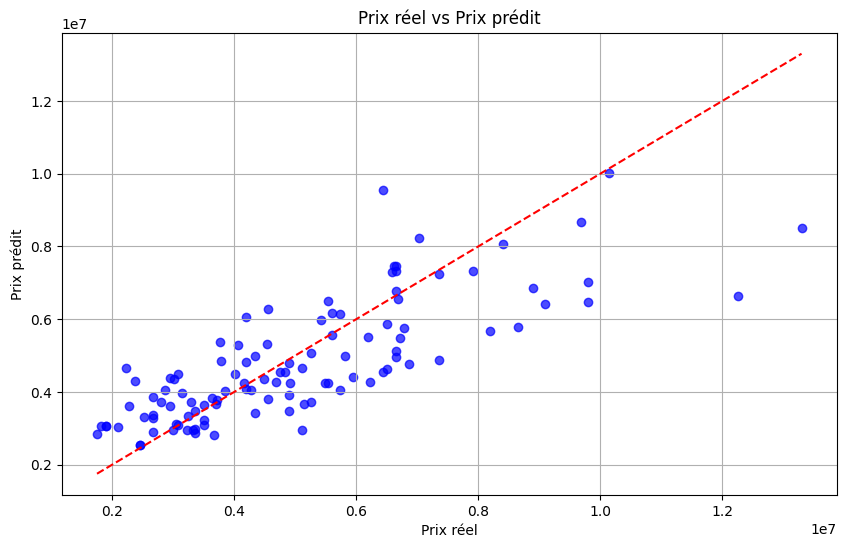

In [225]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Prix réel")
plt.ylabel("Prix prédit")
plt.title("Prix réel vs Prix prédit")
plt.grid(True)
plt.show()